In [4]:
import keras
from keras.datasets import mnist 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('Training shape:', X_train.shape, y_train.shape)
print('Test shape:', X_test.shape, y_test.shape)


Training shape: (60000, 28, 28) (60000,)
Test shape: (10000, 28, 28) (10000,)


In [6]:
#Comprobando el SHAPE
X_train.shape #60000 images of dimensions 28 x 28

(60000, 28, 28)

In [7]:
#Remodelación de X a una matriz 2D para PCA y luego k-means
X = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2]) #We will only be using X for clustering
X.shape

(60000, 784)

In [8]:
y = y_train
#labels = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
labels = '0123456789'

In [9]:
#Comprobando los SHAPE(FORMAS)
print ("The shape of X is " + str(X.shape))
print ("The shape of y is " + str(y.shape)) #We will be using y only to check our clustering 

The shape of X is (60000, 784)
The shape of y is (60000,)


**Index usado para el dataset**
Tambien para comprobar los clusters

* 0: '0'
* 1: '1'
* 2: '2'
* 3: '3'
* 4: '4'
* 5: '5'
* 6: '6'
* 7: '7'
* 8: '8'
* 9: '9'

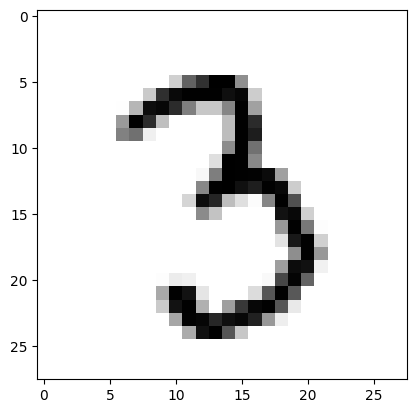

3

In [10]:
#Visualizando imagen en la pos 30000 
n= 30000 #Enter Index here to View the image 
plt.imshow(X[n].reshape(X_train.shape[1], X_train.shape[2]), cmap = plt.cm.binary)
plt.show()
y[n]

# PCA (Análisis de componentes principales)

In [11]:
#Para realizar PCA, primero debemos cambiar la media a 0 y la varianza a 1 para X usando StandardScalar
Clus_dataSet = StandardScaler().fit_transform(X) #(mean = 0 and variance = 1)

In [12]:
from sklearn.decomposition import PCA
# Hacer una instancia del Modelo
variance = 0.98 #Cuanto mayor sea la varianza explicada, más preciso será el modelo
pca = PCA(variance)

In [13]:
#ajuste los datos de acuerdo con nuestra instancia de PCA
pca.fit(Clus_dataSet)

PCA(n_components=0.98)

In [14]:
print("Número de componentes antes de PCA  = " + str(X.shape[1]))
print("Número de componentes despues de 0.98 = " + str(pca.n_components_)) #dimension reduced from 784

Número de componentes antes de PCA  = 784
Número de componentes despues de 0.98 = 459


In [15]:
#Transformar nuestros datos según nuestra instancia PCA
Clus_dataSet = pca.transform(Clus_dataSet)

In [16]:
print("Dimencion despues de PCA  = " + str(Clus_dataSet.shape)) 

Dimencion despues de PCA  = (60000, 459)


In [17]:
#Para visualizar los datos invertidos de PCA
approximation = pca.inverse_transform(Clus_dataSet)
print("Dimensión de nuestros datos después de la transformación inversa al PCA  = " + str(approximation.shape))

Dimensión de nuestros datos después de la transformación inversa al PCA  = (60000, 784)


0


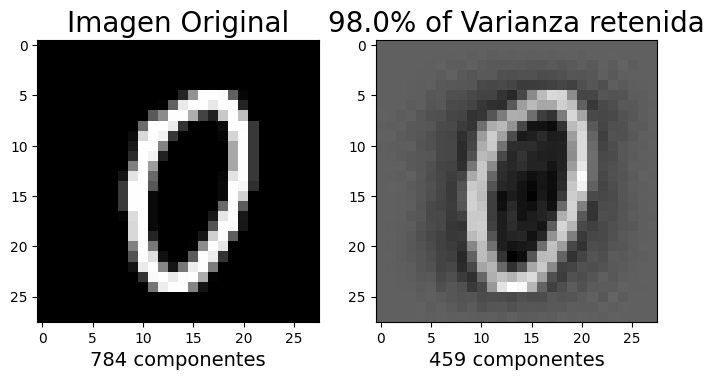

In [18]:
#reconstrucción de imágenes usando los datos menos dimensionados
plt.figure(figsize=(8,4));

n = 1000 #index value, change to view different data

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(X[n].reshape(X_train.shape[1], X_train.shape[2]),
              cmap = plt.cm.gray,);
plt.xlabel(str(X.shape[1])+' componentes', fontsize = 14)
plt.title('Imagen Original', fontsize = 20);


plt.subplot(1, 2, 2);
plt.imshow(approximation[n].reshape(X_train.shape[1], X_train.shape[2]),
              cmap = plt.cm.gray,);
plt.xlabel(str(Clus_dataSet.shape[1]) +' componentes', fontsize = 14)
plt.title(str(variance * 100) + '% of Varianza retenida', fontsize = 20);

print(y_train[n])

## K-MEANS ++

La clase KMeans tiene muchos parámetros que se pueden usar, pero usaremos estos tres:

* Método de inicialización de los centroides.
* El valor será: __k-means++__
* __k-means++__: selecciona los centros de conglomerados iniciales para la agrupación en conglomerados de k-media de forma inteligente para acelerar la convergencia.
* __n_clusters__ El número de clústeres a formar así como el número de centroides a generar.
* El valor será: 10 (tenemos 10 clases según INDEX)
* __n_init__: número de veces que se ejecutará el algoritmo k-means con diferentes semillas de centroide. Los resultados finales serán la mejor salida de n_init ejecuciones consecutivas en términos de inercia.
* El valor será: Dependerá de nuestros resultados de inercia

Inicialice KMeans con estos parámetros, donde el parámetro de salida se llama __k_means__

In [19]:
# ESTE CÓDIGO TARDA MUCHO EN EJECUTARSE, ES PARA ENCONTRAR EL VALOR n_init.
# #Usaremos k = 10, no es la mejor elección pero por simplicidad ya que el ÍNDICE tiene 10 valores
# #para verificar el mejor n_init con k = 10
# inertia = []
# for k in range(5, 100):
#     kmeans = KMeans(init = "k-means++",n_clusters=10, n_init = k,random_state=1).fit(Clus_dataSet)
#     inertia.append(np.sqrt(kmeans.inertia_))

# plt.plot(range(5, 100), inertia, marker='s');
# plt.xlabel('$k$')
# plt.ylabel('$J(C_k)$');

In [20]:
#n_clusters = 10 porque ÍNDICE tiene 10 valores. No es el mejor valor pero una lógica simple.
#El valor de n_init en 35 da buenos resultados, así que lo usaremos. Para confirmarnos el código anterior.
k_means = KMeans(init = "k-means++", n_clusters = 10, n_init = 35)

In [21]:
#ajuste los datos a nuestro modelo k_means
k_means.fit(Clus_dataSet)

KMeans(n_clusters=10, n_init=35)

In [22]:
k_means_labels = k_means.labels_ #List of labels of each dataset
print("The list of labels of the clusters are " + str(np.unique(k_means_labels)))

The list of labels of the clusters are [0 1 2 3 4 5 6 7 8 9]


In [23]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
G = len(np.unique(k_means_labels)) #Number of labels

#Matriz 2D para una matriz de índices de la etiqueta dada
cluster_index= [[] for i in range(G)]
for i, label in enumerate(k_means_labels,0):
    for n in range(G):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue
  

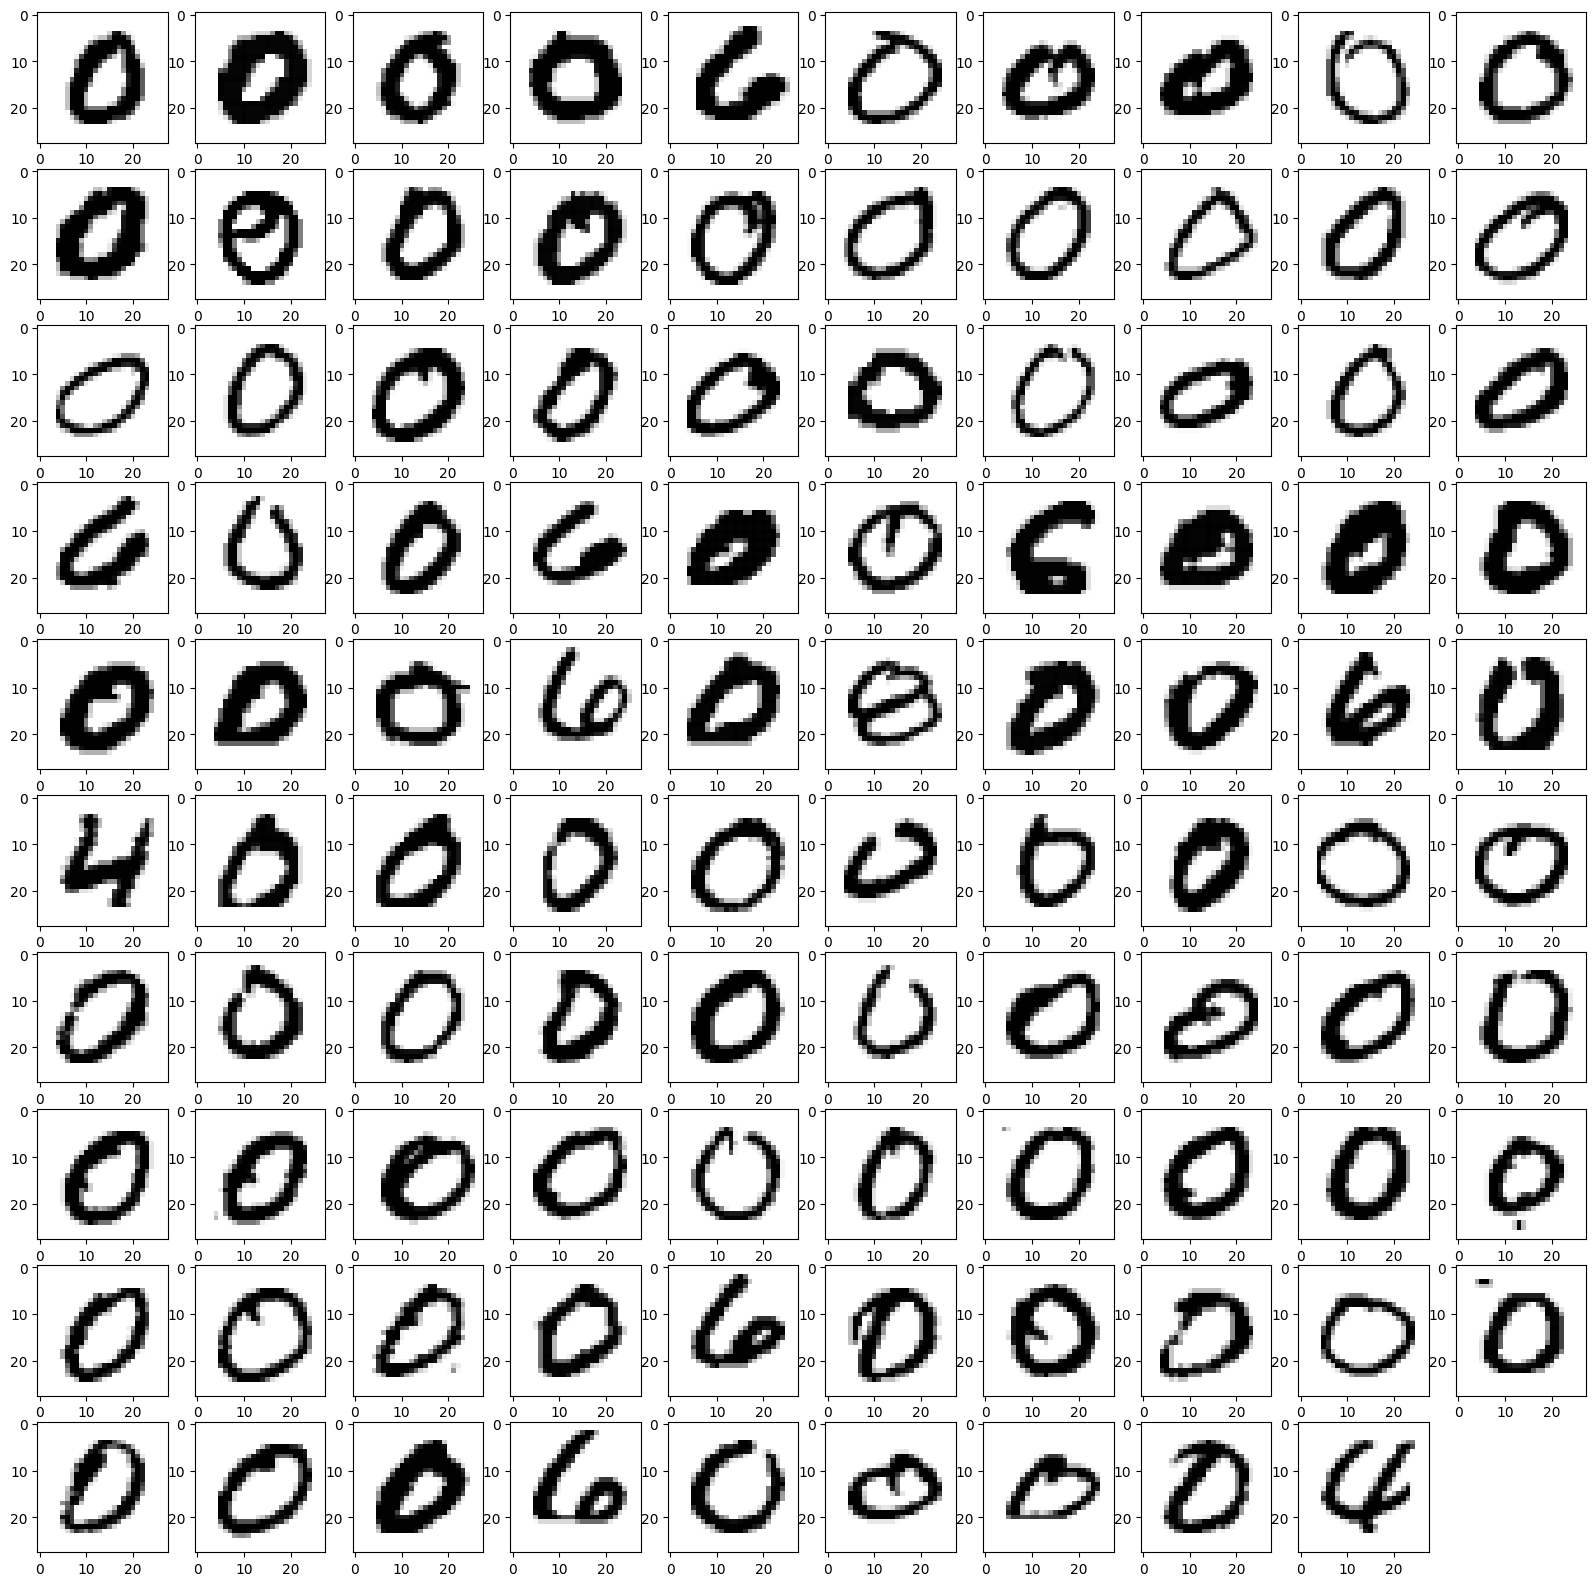

In [25]:
#Visualisation for clusters = clust
plt.figure(figsize=(20,20));
clust = 9
for i in range(1,100):
    plt.subplot(10, 10, i); #(Number of rows, Number of column per row, item number)
    plt.imshow(X[cluster_index[clust][i+500]].reshape(X_train.shape[1], X_train.shape[2]), cmap = plt.cm.binary);
    
plt.show()

For Cluster 9 you can its mostly Ankle Boots with a few other items

In [26]:
Y_clust = [[] for i in range(G)]
for n in range(G):
    Y_clust[n] = y[cluster_index[n]] #Y_clust[0] contiene una matriz de la categoría "correcta" de y_train para el cluster_index[0]
    assert(len(Y_clust[n]) == len(cluster_index[n])) #confirmación de dimensión


In [27]:
#cuenta el número de cada categoría en cada grupo
def counter(cluster):
    unique, counts = np.unique(cluster, return_counts=True)
    label_index = dict(zip(unique, counts))
    return label_index

In [28]:
label_count= [[] for i in range(G)]
for n in range(G):
    label_count[n] = counter(Y_clust[n])

label_count[1] #Número de elementos de una determinada categoría en el clúster 1

{0: 21, 1: 6, 2: 171, 3: 170, 4: 3469, 5: 284, 6: 29, 7: 1445, 8: 341, 9: 2954}

In [29]:
class_names = {0:'0', 1:'1',2: '2',3: '3',4: '4',5:
               '5',6: '6', 7:'7',8:  '8',9: '9'} #Dictionary of class names

#Una función para trazar un gráfico de barras para visualizar la cantidad de elementos de cierta categoría en un grupo
def plotter(label_dict):
    plt.bar(range(len(label_dict)), list(label_dict.values()), align='center')
    a = []
    for i in [*label_dict]: a.append(class_names[i])
    plt.xticks(range(len(label_dict)), list(a), rotation=45, rotation_mode='anchor')

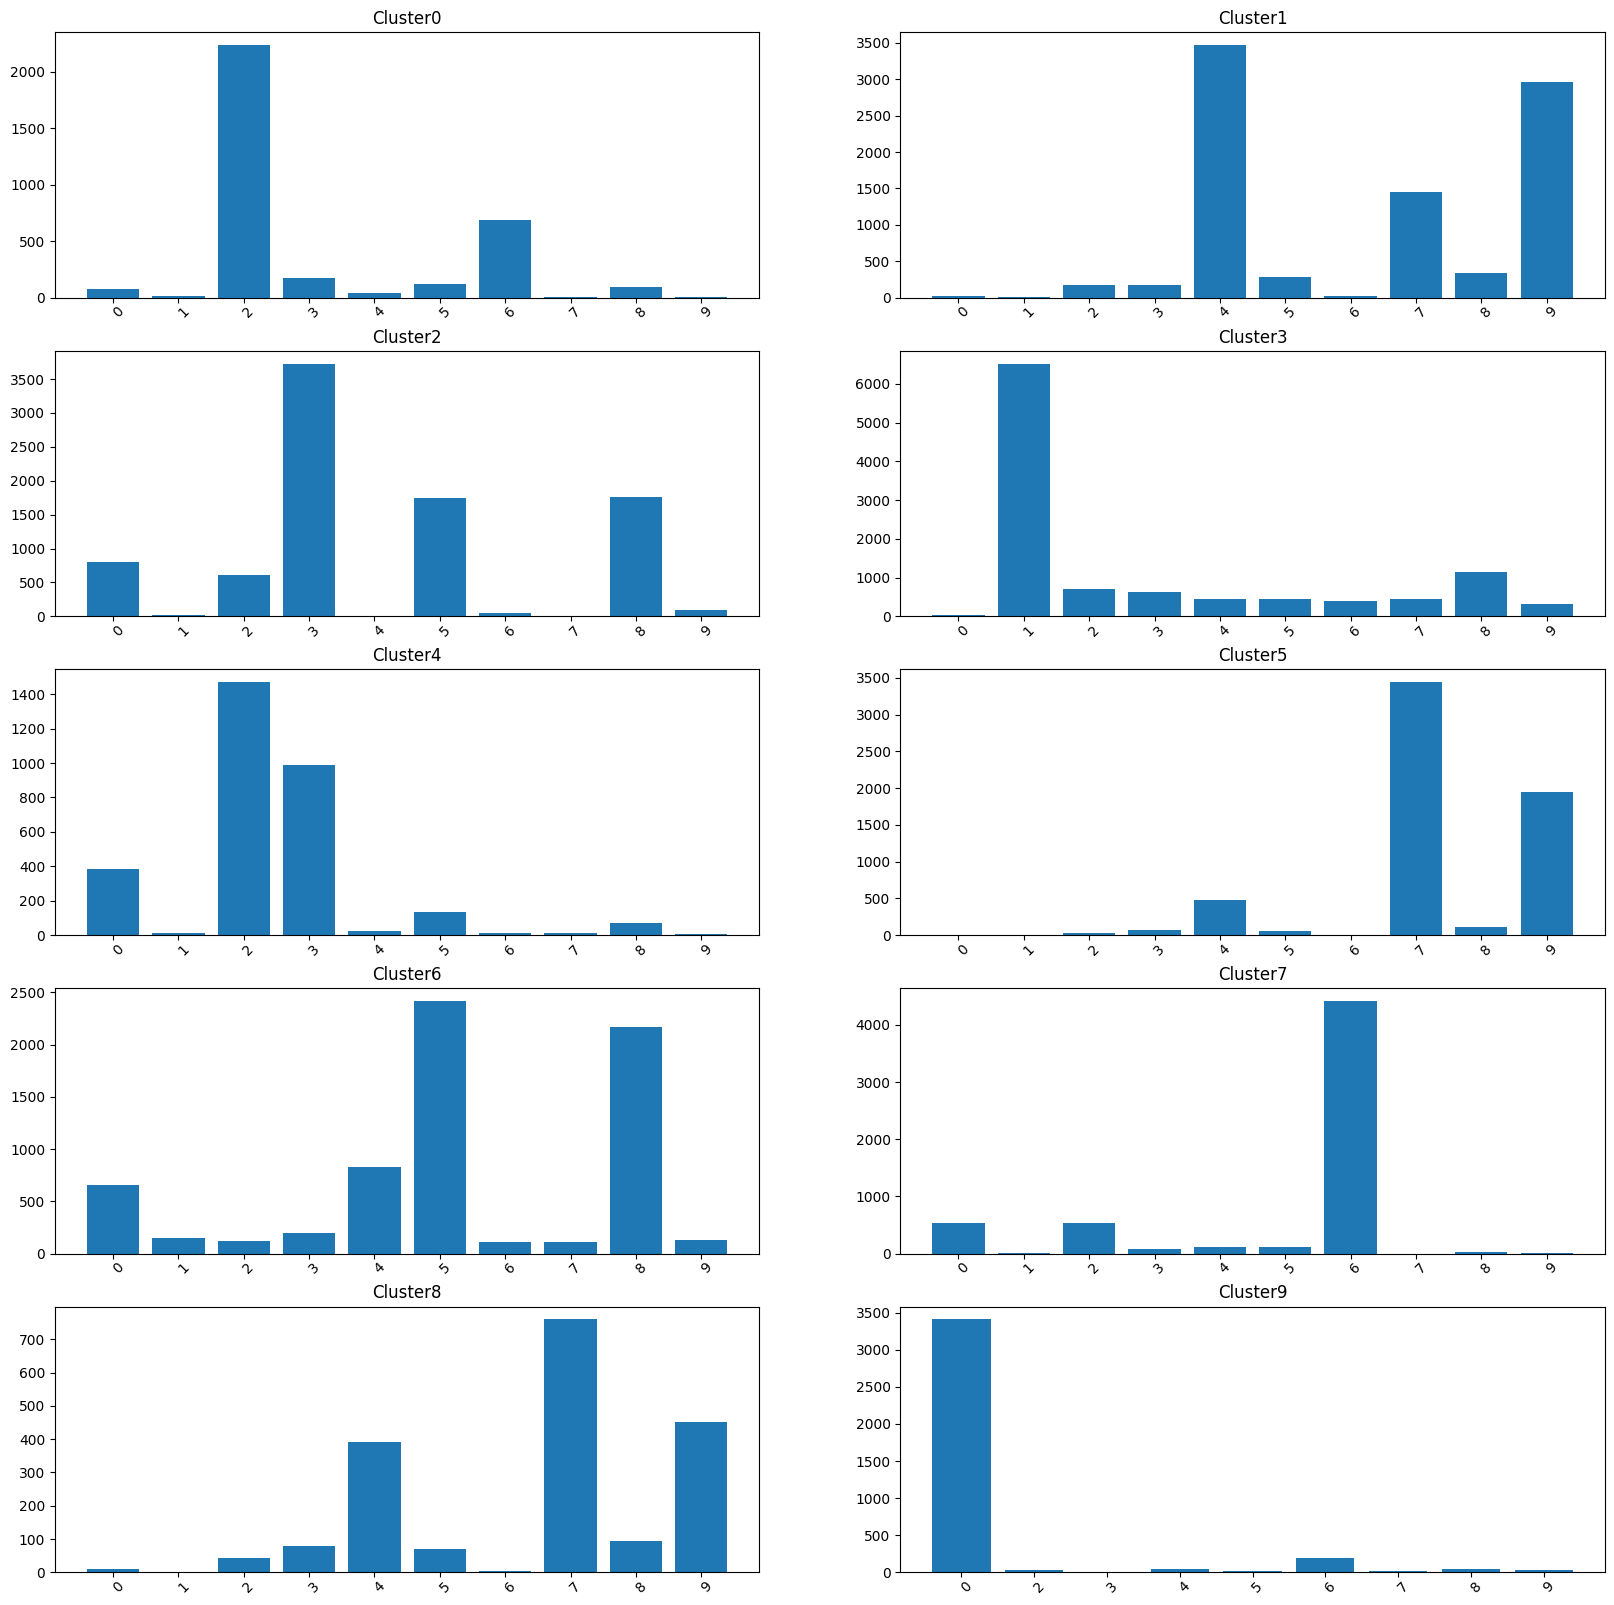

In [30]:
#Gráfico de barras con el número de artículos de diferentes categorías agrupados en él
plt.figure(figsize=(20,20))
for i in range (1,11):
    plt.subplot(5, 2, i)
    plotter(label_count[i-1]) 
    plt.title("Cluster" + str(i-1))

In [31]:
k_means_cluster_centers = k_means.cluster_centers_ #numpy array of cluster centers
k_means_cluster_centers.shape #comes from 10 clusters and 420 features 

(10, 459)

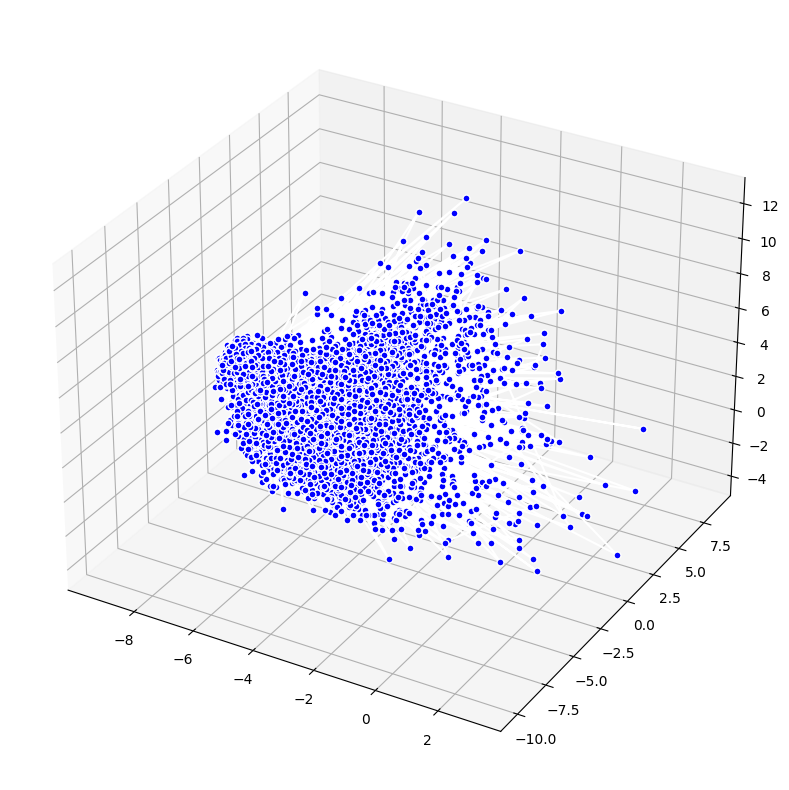

In [32]:
#cluster visualisation
my_members = (k_means_labels == 3) #Enter different Cluster number to view its 3D plot
my_members.shape
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1,projection='3d')
#Clus_dataSet.shape
#Clus_dataSet[my_members,300].shape
ax.plot(Clus_dataSet[my_members, 0], Clus_dataSet[my_members,1],Clus_dataSet[my_members,2], 'w', markerfacecolor="blue", marker='.',markersize=10)

In [33]:
#install these if you haven't
#! pip install chart_studio 
#! pip install plotly

In [34]:
import plotly as ply
import plotly.graph_objs as go
import plotly.express as px

In [35]:
#3D Plotly Visualizacion de Clusters usando go

layout = go.Layout(
    title='<b>Visualizacion de Clusters</b>',
    yaxis=dict(
        title='<i>Y</i>'
    ),
    xaxis=dict(
        title='<i>X</i>'
    )
)

colors = ['red','green' ,'blue','purple','magenta','yellow','cyan','maroon','teal','black']
trace = [ go.Scatter3d() for _ in range(11)]
for i in range(0,10):
    my_members = (k_means_labels == i)
    index = [h for h, g in enumerate(my_members) if g]
    trace[i] = go.Scatter3d(
            x=Clus_dataSet[my_members, 0],
            y=Clus_dataSet[my_members, 1],
            z=Clus_dataSet[my_members, 2],
            mode='markers',
            marker = dict(size = 2,color = colors[i]),
            hovertext=index,
            name='Cluster'+str(i),
   
            )

fig = go.Figure(data=[trace[0],trace[1],trace[2],trace[3],trace[4],trace[5],trace[6],trace[7],trace[8],trace[9]], layout=layout)
    
ply.offline.iplot(fig)


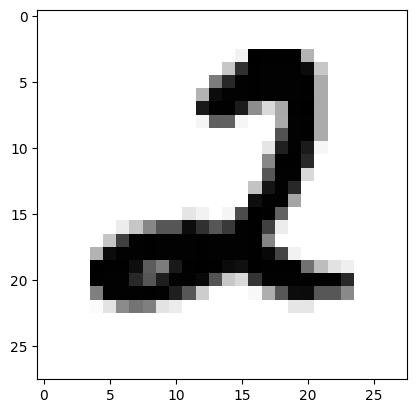

In [40]:
#Si pasa el cursor sobre los puntos en los gráficos anteriores, obtendrá un valor de índice
n = 18017 #Use that value here to visualise the selected data
plt.imshow(X[n].reshape(28, 28), cmap = plt.cm.binary)
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4343f43f-20c4-410b-94c3-12c4e7974760' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>